### Assignment 03
**Convolutional Neural Network**: Use MNIST Fashion Dataset and create a classifier to classify fashion clothing into categories

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


In [5]:
# Import the fashion_mnist datase
from tensorflow.keras.datasets import fashion_mnist

# Split the dataset into train and test
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()

29515/29515 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
26421880/26421880 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
5148/5148 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
4422102/4422102 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [6]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Conv2D, MaxPooling2D, Flatten
from tensorflow.keras.losses import sparse_categorical_crossentropy

# A CNN model with the following layers:
model = Sequential()
model.add(Conv2D(128, kernel_size=(3,3), activation='relu', input_shape=(28,28,1)))
model.add(MaxPooling2D())
model.add(Flatten())
model.add(Dropout(0.2))
model.add(Dense(128, activation='relu'))
model.add(Dense(10, activation='softmax'))
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])




/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [7]:
# Trains the CNN on the training data for 5 epochs.

model.fit(x_train, y_train, epochs=5)


Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 173s 91ms/step - accuracy: 0.8005 - loss: 4.4428
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 188s 84ms/step - accuracy: 0.8916 - loss: 0.3015
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 200s 83ms/step - accuracy: 0.9046 - loss: 0.2630
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 196s 80ms/step - accuracy: 0.9073 - loss: 0.2541
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 205s 81ms/step - accuracy: 0.9148 - loss: 0.2334


In [8]:
# Evaluate the model
metrics = model.evaluate(x_test, y_test)


313/313 ━━━━━━━━━━━━━━━━━━━━ 5s 16ms/step - accuracy: 0.8931 - loss: 0.3408


In [9]:
# Print the metrics
metrics


[0.33325156569480896, 0.8956999778747559]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 88ms/step
Predicted: Shirt
Actual: Shirt
Correct Label Predicted


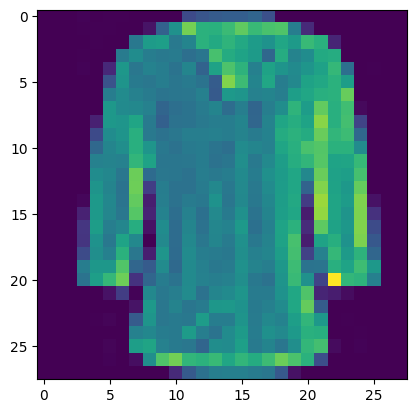

In [10]:
# Predicts label for 5th test image (image_index = 4)
image_index = 4
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

prediction = model.predict(x_test[image_index:image_index+1])
predicted_label = np.argmax(prediction)
true_label = y_test[image_index]

print(f"Predicted: {class_names[predicted_label]}")
print(f"Actual: {class_names[true_label]}")


# Compares it with actual label and prints result.
if np.argmax(prediction) == y_test[image_index]:
    print("Correct Label Predicted")
else:
    print("Incorrect Label Predicted")


# Displays the image using imshow
plt.imshow(x_test[image_index:image_index+1][0])